# Insurance Claims- Fraud Detection

- Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

- We will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
df.shape   #checking te data dimensiion

(1000, 40)

In [6]:
df.columns   #checking the columns of the dataset

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.dtypes   #checking the data types of each column

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
#checking the null values in the dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- As we can see their is no value in the _c39 column, So we can drop that column.

In [9]:
df=df.drop('_c39', axis=1)

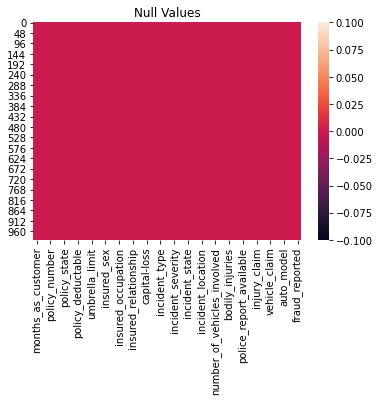

In [10]:
#checking the null values in dataset by using heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

- We can see that their is no null values in the dataset now.

### Visualization of the Data

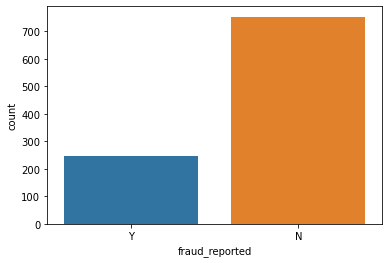

In [11]:
sns.countplot(x='fraud_reported',data=df)
plt.show()

In [12]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

- From the above graph we can see that majority of the people that claim insurance are not fraud.

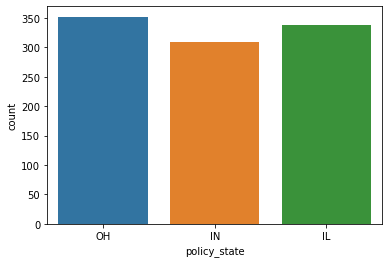

In [13]:
sns.countplot(x='policy_state',data=df)
plt.show()

- We can see that from 'OH' more people claim the insurance.

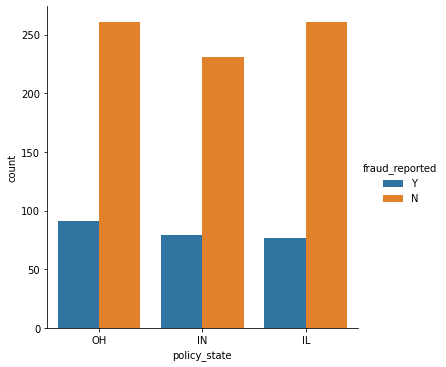

In [14]:
sns.catplot(x ="policy_state", hue ="fraud_reported",  kind ="count", data = df) 

- We can see that in all the 3 states the majority of the claims are not fraud.

<AxesSubplot:xlabel='age', ylabel='Density'>

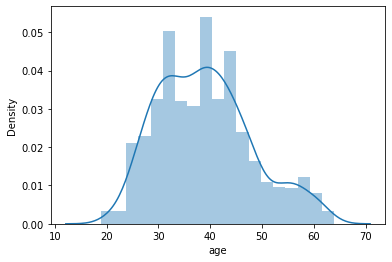

In [15]:
sns.distplot(df["age"])

- We can see that from the above dataset that the ageof the people the claims the insurance are in range from 20 to 65.

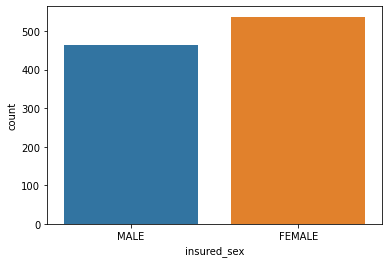

In [16]:
sns.countplot(x='insured_sex',data=df)
plt.show()

- From the above grah we can see that more number of female are insured.

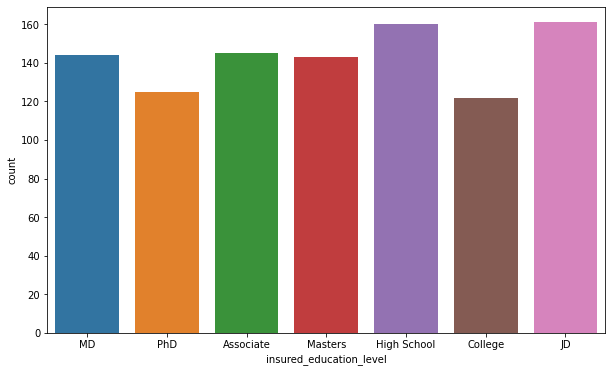

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='insured_education_level',data=df) 
plt.show()

- from the above graph we can see that majority of the people who are insured are from 'high school' or 'JD'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

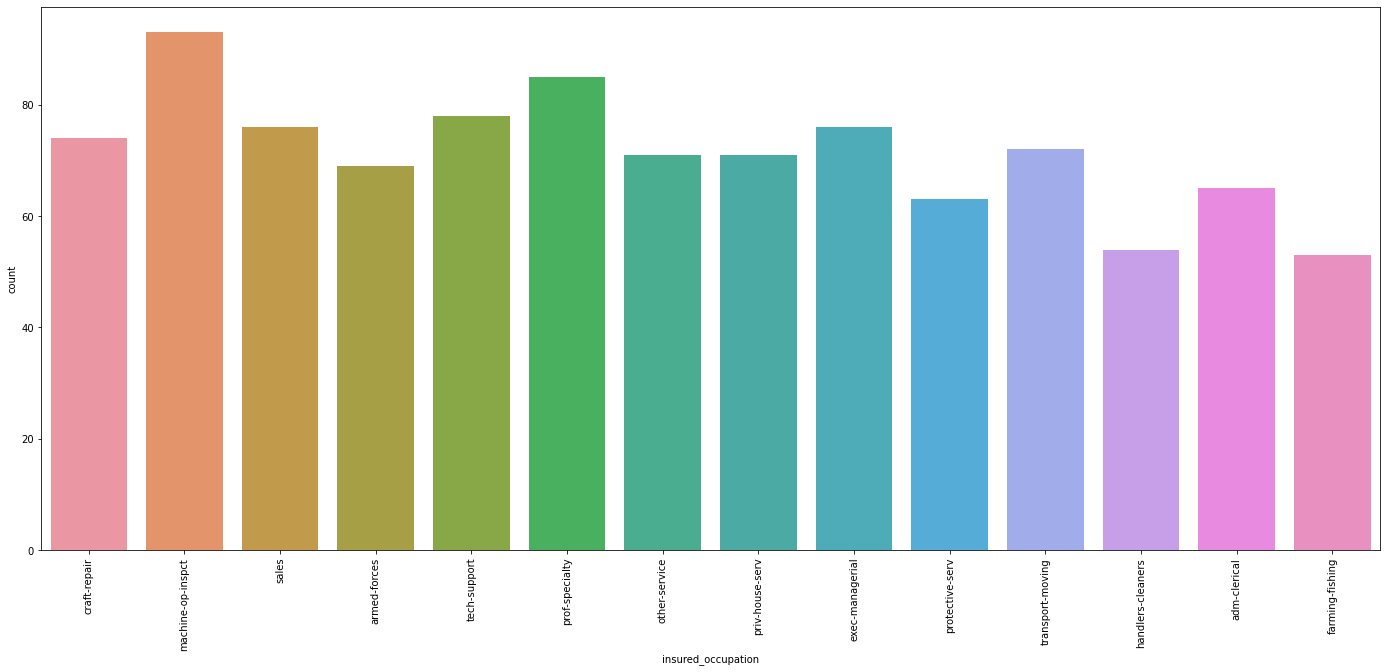

In [18]:
plt.figure(figsize=(24,10))
sns.countplot(df['insured_occupation']) 
plt.xticks(rotation=90)

- From the above graph we can see that majority of the person that are insured are working as 'machine-op-inspct'.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

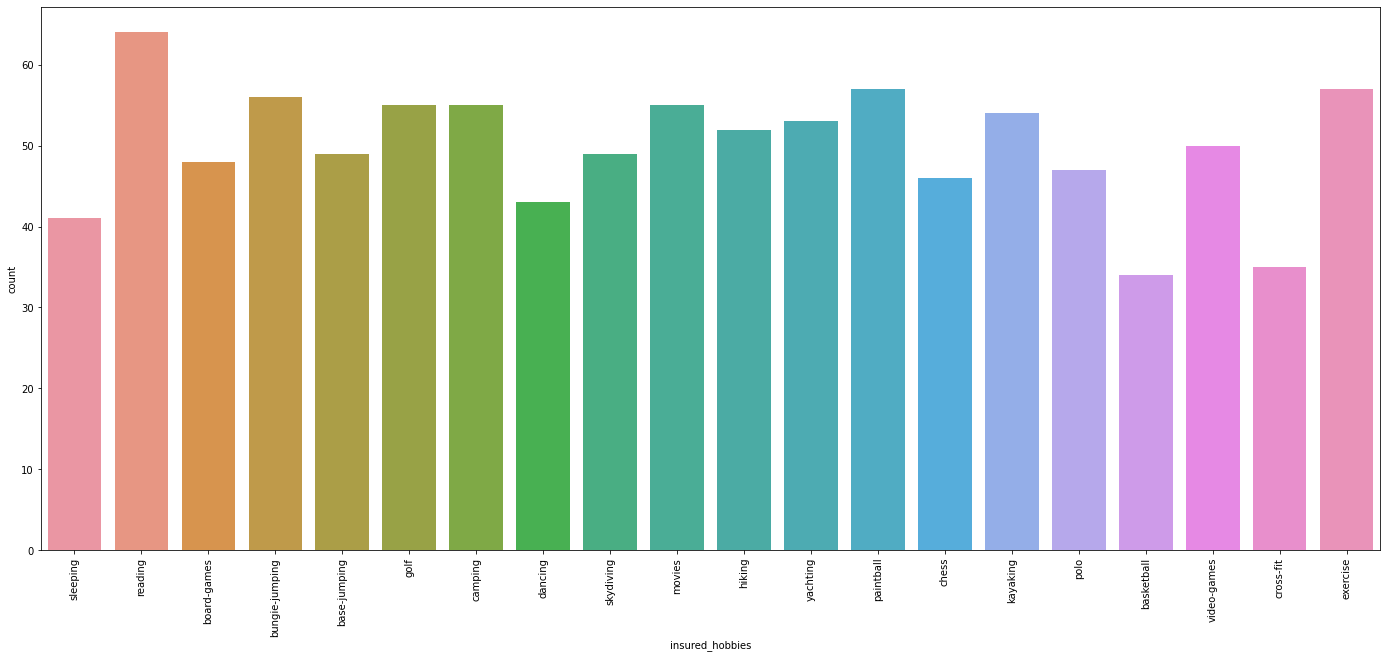

In [19]:
plt.figure(figsize=(24,10))
sns.countplot(df['insured_hobbies']) 
plt.xticks(rotation=90)

- from the above graph we can see that more number of people that are insured have a hobby of 'reading'.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

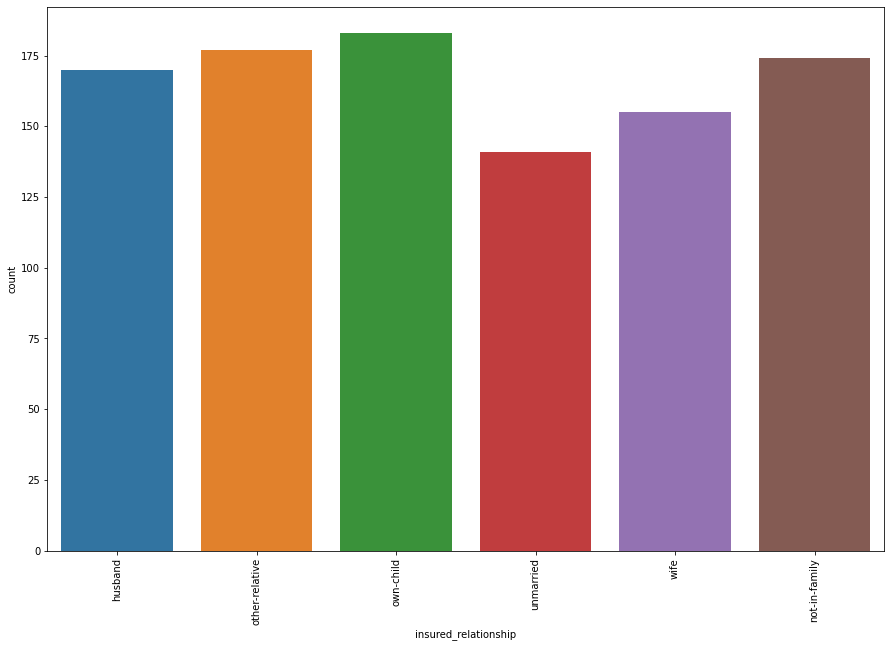

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(df['insured_relationship']) 
plt.xticks(rotation=90)

- from the above graph we can see that more number of people have insured their 'own-child'.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

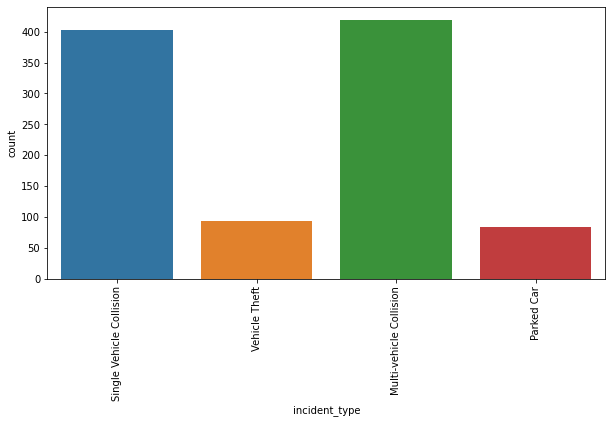

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df['incident_type']) 
plt.xticks(rotation=90)

- From the above graph we can see that the majority of the incident are of 'Mutiple-vechile collision' or 'single vehicle collision'.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, '?'),
  Text(2, 0, 'Rear Collision'),
  Text(3, 0, 'Front Collision')])

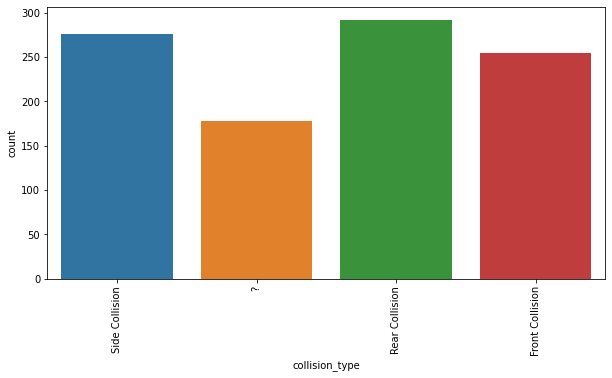

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df['collision_type']) 
plt.xticks(rotation=90)

- From the above graph we can see that more collision are from Rear.

<AxesSubplot:ylabel='authorities_contacted'>

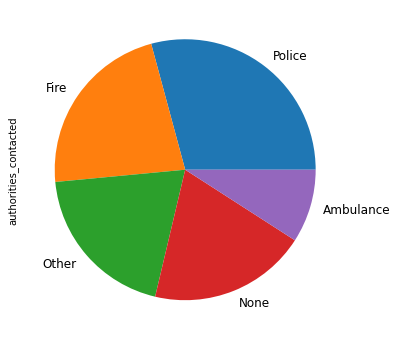

In [23]:
plt.figure(figsize=(10,6))
(df['authorities_contacted'].value_counts()*100 /len(df)).plot.pie(labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)

- From the above pie chart we can see that in majority of the cases, the 'Fire' and 'Police' authorities are contacted.

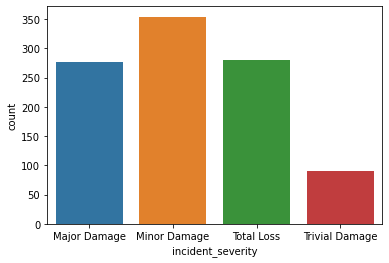

In [24]:
sns.countplot(x='incident_severity',data=df)
plt.show()

- from the above graph we can see that majority of the incident only have minor damage.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'SC'),
  Text(1, 0, 'VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OH'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'PA')])

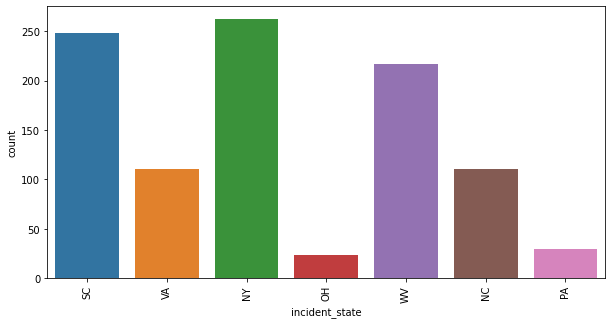

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['incident_state']) 
plt.xticks(rotation=90)

- from the above graph we can see that majority of the caims are from 'NY','SC' and 'WV'.

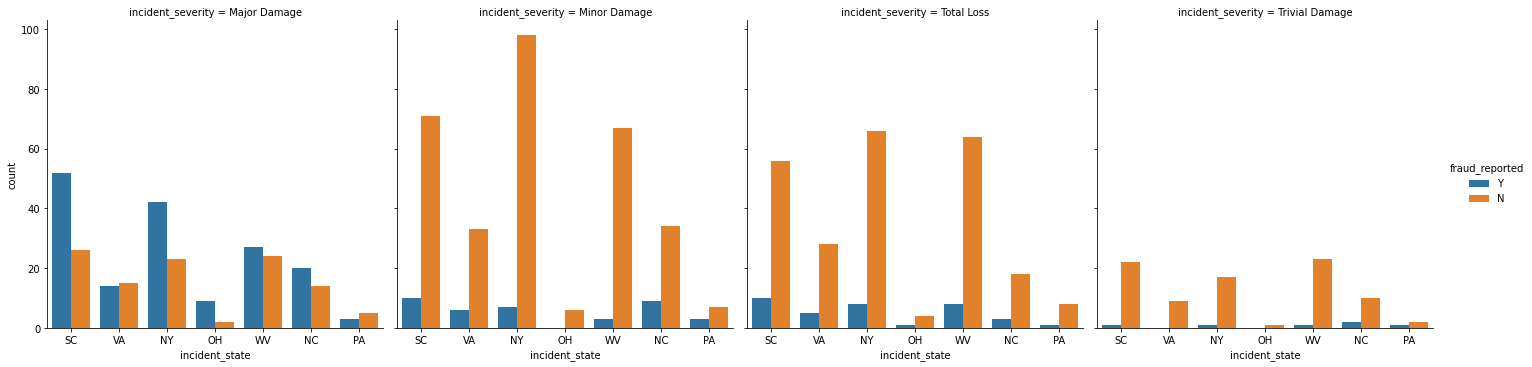

In [26]:
sns.catplot(x ='incident_state', hue ='fraud_reported', kind ='count', col ='incident_severity', data = df) 

- from the above graph we can see that in major damage condition in 'PA' and 'VA' state only the majority of the claim is not fraud.

- from the above graph we can see that in 'minor damage','Total loss','Trivial Damage' condition no state customer has do a fraud claim.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

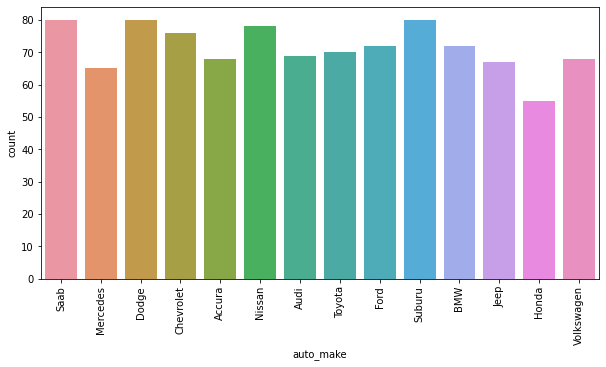

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df['auto_make']) 
plt.xticks(rotation=90)

- from the above grah we can see that more number of automobile are of 'Saab' and 'Dodge'.

<AxesSubplot:xlabel='auto_make'>

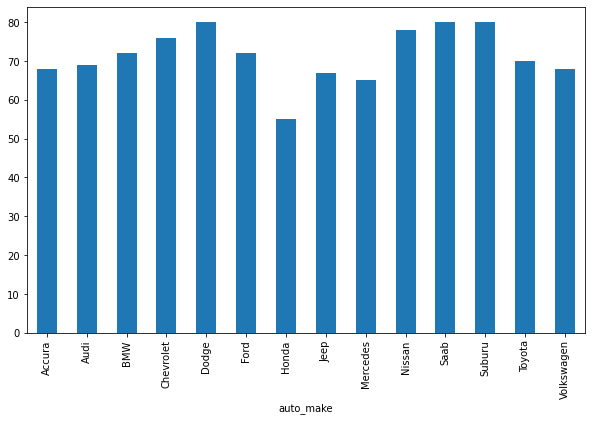

In [28]:
plt.figure(figsize=(10,6))
df.groupby('auto_make').vehicle_claim.count().plot.bar()

- from the above graph we can see that 'Saab','Dodge' and 'Suburu' have maximum claim count.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

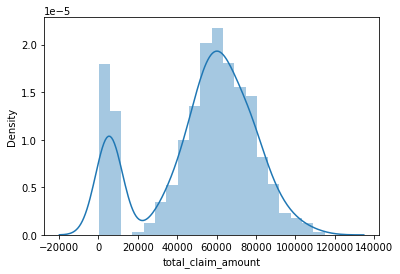

In [29]:
sns.distplot(df["total_claim_amount"])

- from the above graph we can see that the majority claim amount is between 50000 to 60000.

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

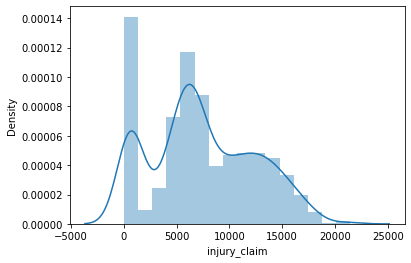

In [30]:
sns.distplot(df["injury_claim"])

- from the above graph we can see that the majority of the injury claim is between 0 to 1250.

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

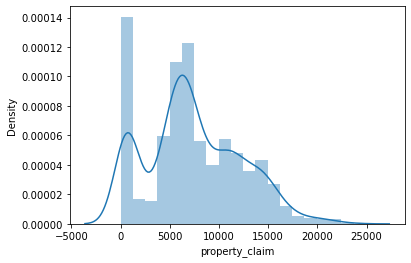

In [31]:
sns.distplot(df["property_claim"])


- from the above graph we can see that the majority of the property claim is in range of 0 to 1250.

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

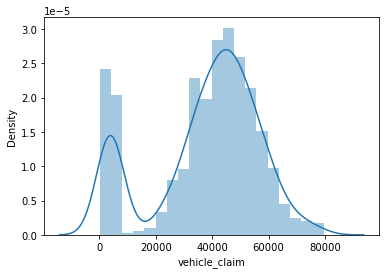

In [32]:
sns.distplot(df["vehicle_claim"])

- from the above graph we can see that majority of the vechile claim is in range from 40000 to 55000.

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>],
       [<AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>],
       [<AxesSubplot:title={'center':'vehicle_claim'}>,
        <Ax

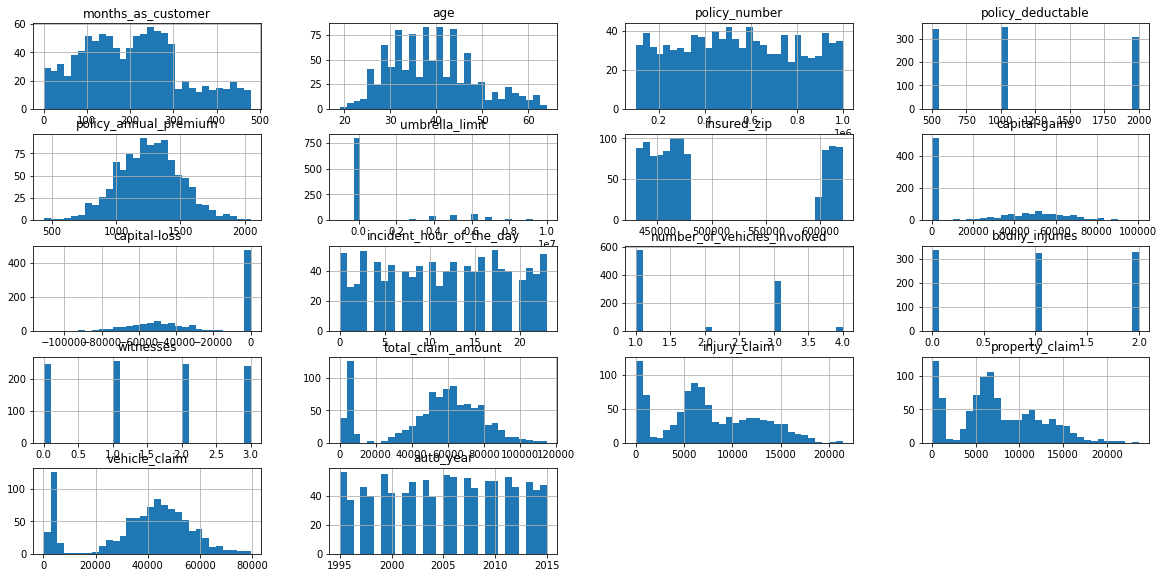

In [33]:
# 'Histogram to see the data distribution of all the columns'
df.hist(figsize=(20,20), grid = True, layout = (10,4), bins = 30)

In [34]:
#Changing thhe datatypes of te object column
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

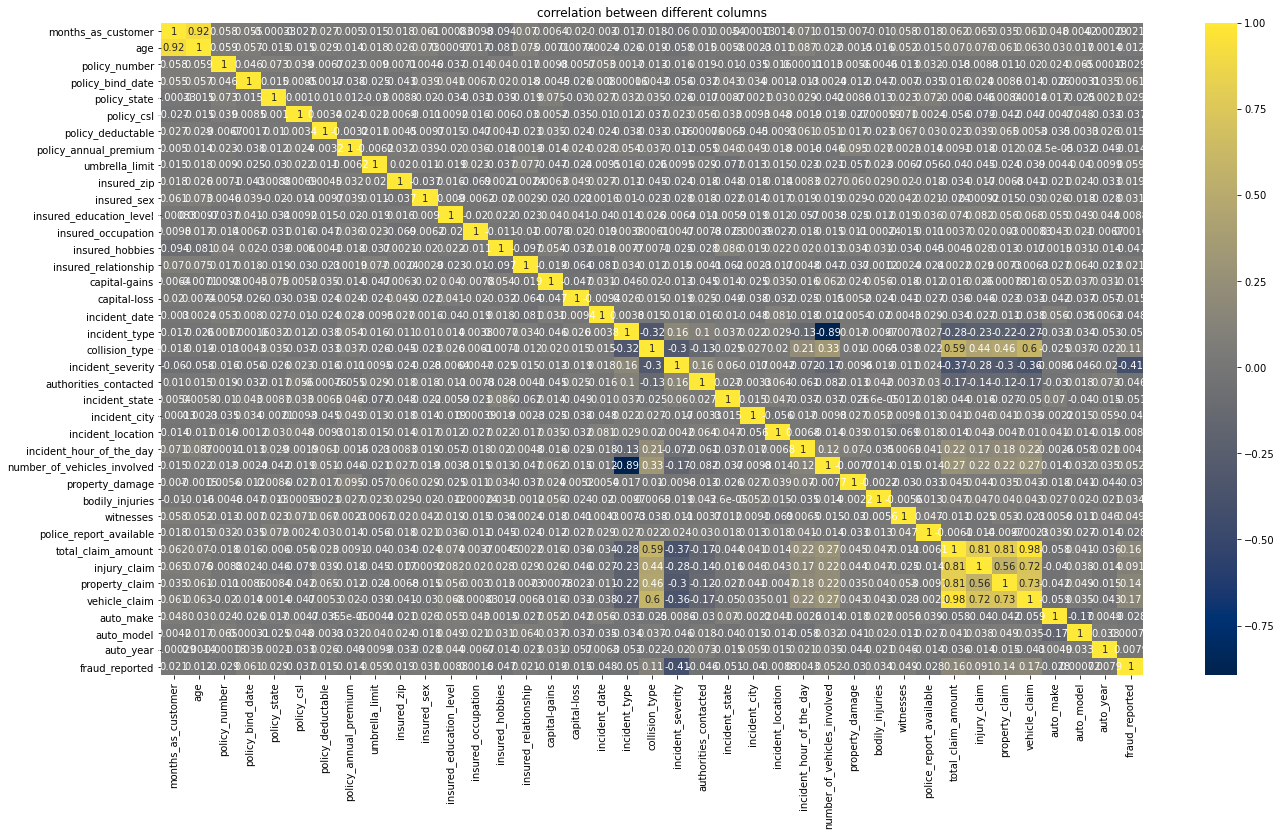

In [35]:
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

In [36]:
#defining corr between every column to the target column

corr_matrix=df.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


- from the above observations we can see that vehicle claim amount is  most positively correlated column with the fraud_reported column.
- we can also see that incident_severityis the most negetively correlated column with the fraud_reported column.

In [37]:
df['vehicle_age'] = 2021 - df['auto_year']

In [38]:
df = df.drop(columns =['policy_number', 'insured_zip', 'policy_bind_date', 'incident_date', 'incident_location', 'auto_year'])


- we can drop these column because they will not help us to predict whether the insurance claim is fraud or not.

In [39]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,2.0,1.0,1000,1406.91,0,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,3.0,0.0,4.0,4.0,1.0,5,1,2.0,1,2,2.0,71610,6510,13020,52080,10.0,1.0,1.0,17
1,228,42,1.0,1.0,2000,1197.22,5000000,1.0,4.0,6.0,15.0,2.0,0,0,3.0,0.0,1.0,4.0,5.0,5.0,8,1,0.0,0,0,0.0,5070,780,780,3510,8.0,12.0,1.0,14
2,134,29,2.0,0.0,2000,1413.14,5000000,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,2.0,1.0,4.0,1.0,1.0,7,3,1.0,2,3,1.0,34650,7700,3850,23100,4.0,30.0,0.0,14
3,256,41,0.0,1.0,2000,1415.74,6000000,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,1.0,0.0,4.0,2.0,0.0,5,1,0.0,1,2,1.0,63400,6340,6340,50720,3.0,34.0,1.0,7
4,228,44,0.0,2.0,1000,1583.91,6000000,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,0.0,1.0,2.0,1.0,0.0,20,1,1.0,0,1,1.0,6500,1300,650,4550,0.0,31.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,0.0,5.0,2.0,13.0,4.0,0,0,2.0,1.0,1.0,1.0,0.0,4.0,20,1,2.0,0,1,0.0,87200,17440,8720,61040,6.0,6.0,0.0,15
996,285,41,0.0,0.0,1000,1436.79,0,0.0,6.0,9.0,17.0,5.0,70900,0,2.0,2.0,0.0,1.0,4.0,3.0,23,1,2.0,2,3,0.0,108480,18080,18080,72320,13.0,28.0,0.0,6
997,130,34,2.0,1.0,500,1383.49,3000000,0.0,5.0,1.0,3.0,2.0,35100,0,0.0,3.0,1.0,4.0,0.0,0.0,4,3,0.0,2,3,2.0,67500,7500,7500,52500,11.0,19.0,0.0,25
998,458,62,0.0,2.0,2000,1356.92,5000000,1.0,0.0,5.0,0.0,5.0,0,0,2.0,2.0,0.0,3.0,1.0,0.0,2,1,0.0,0,1,2.0,46980,5220,5220,36540,1.0,5.0,0.0,23


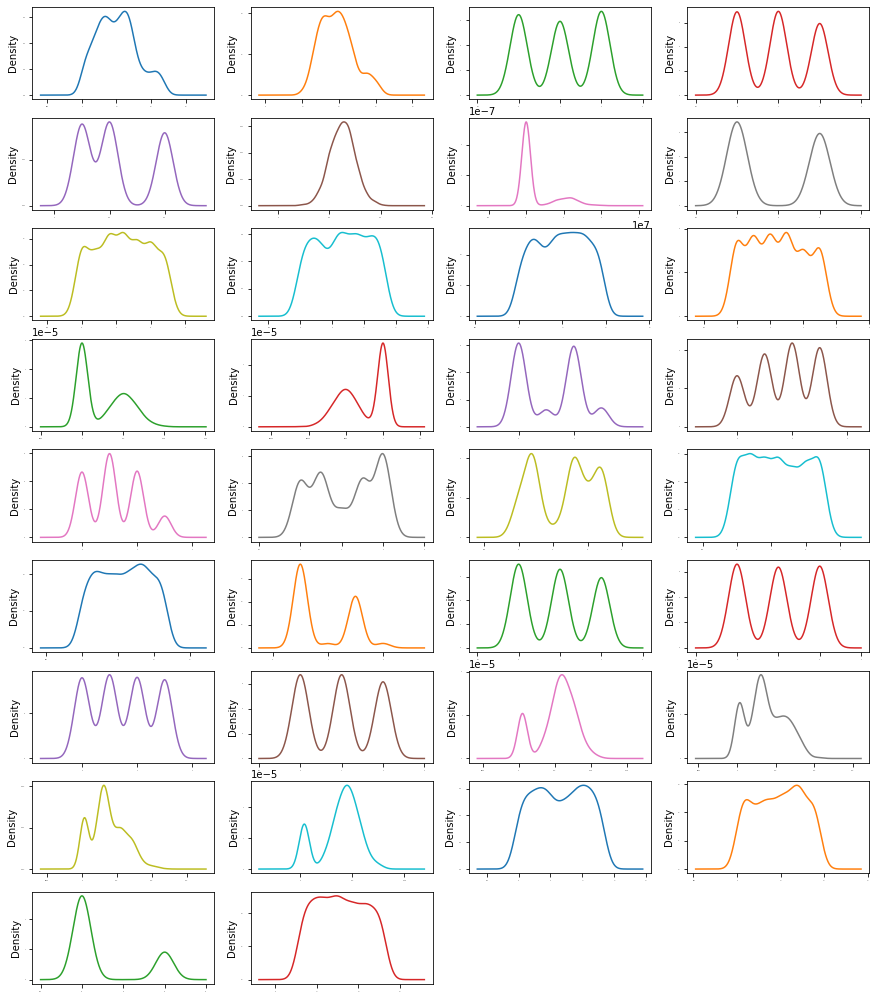

In [40]:
df.plot(kind='density',subplots=True,  layout=(10,4), sharex=False, legend=False, fontsize=1, figsize=(15,20))
plt.show()

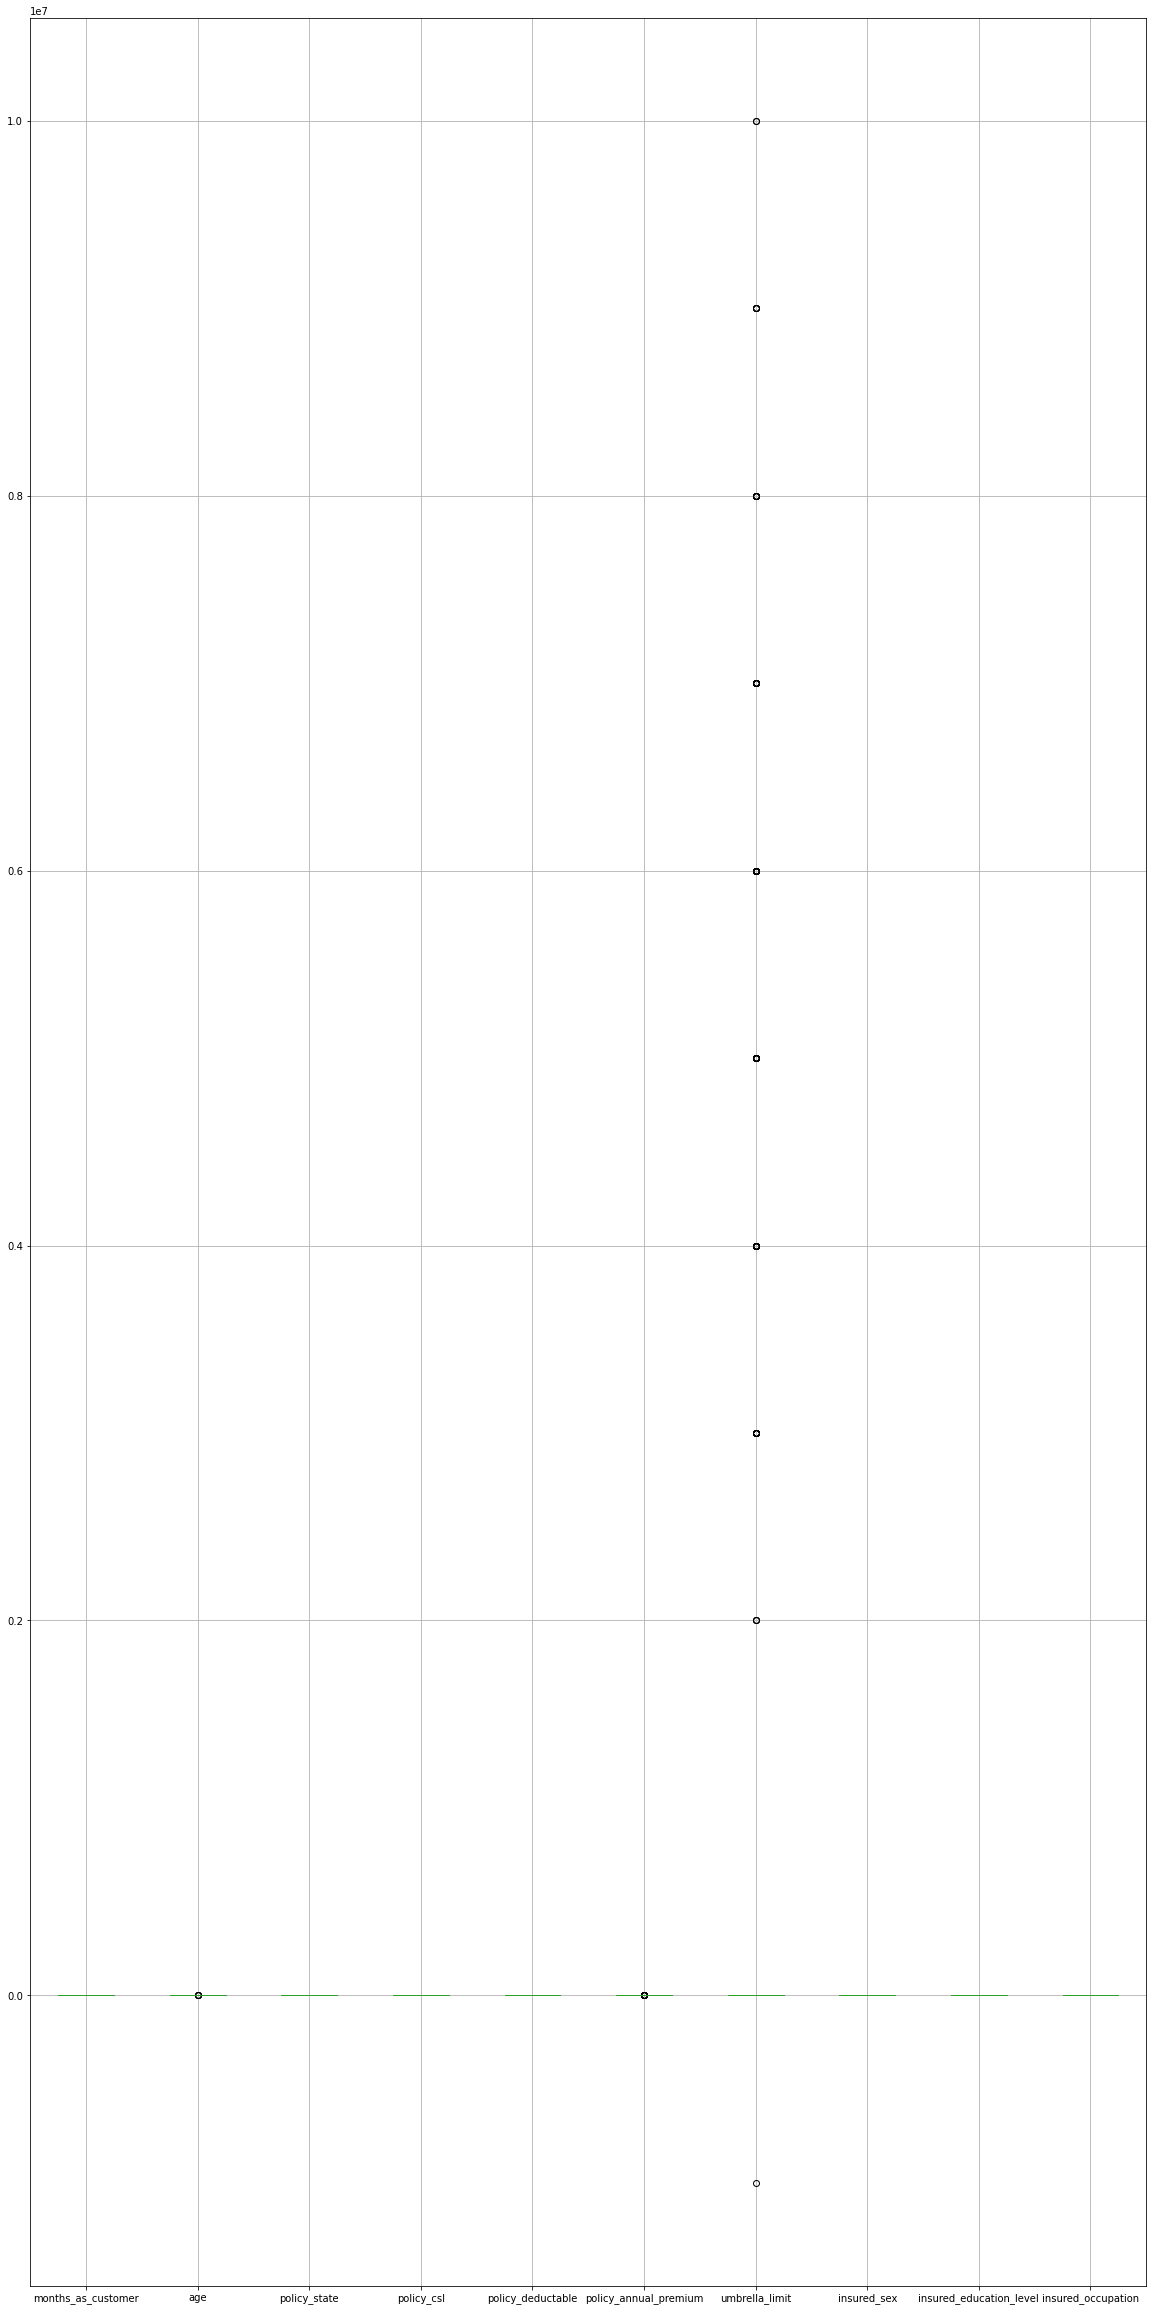

In [41]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

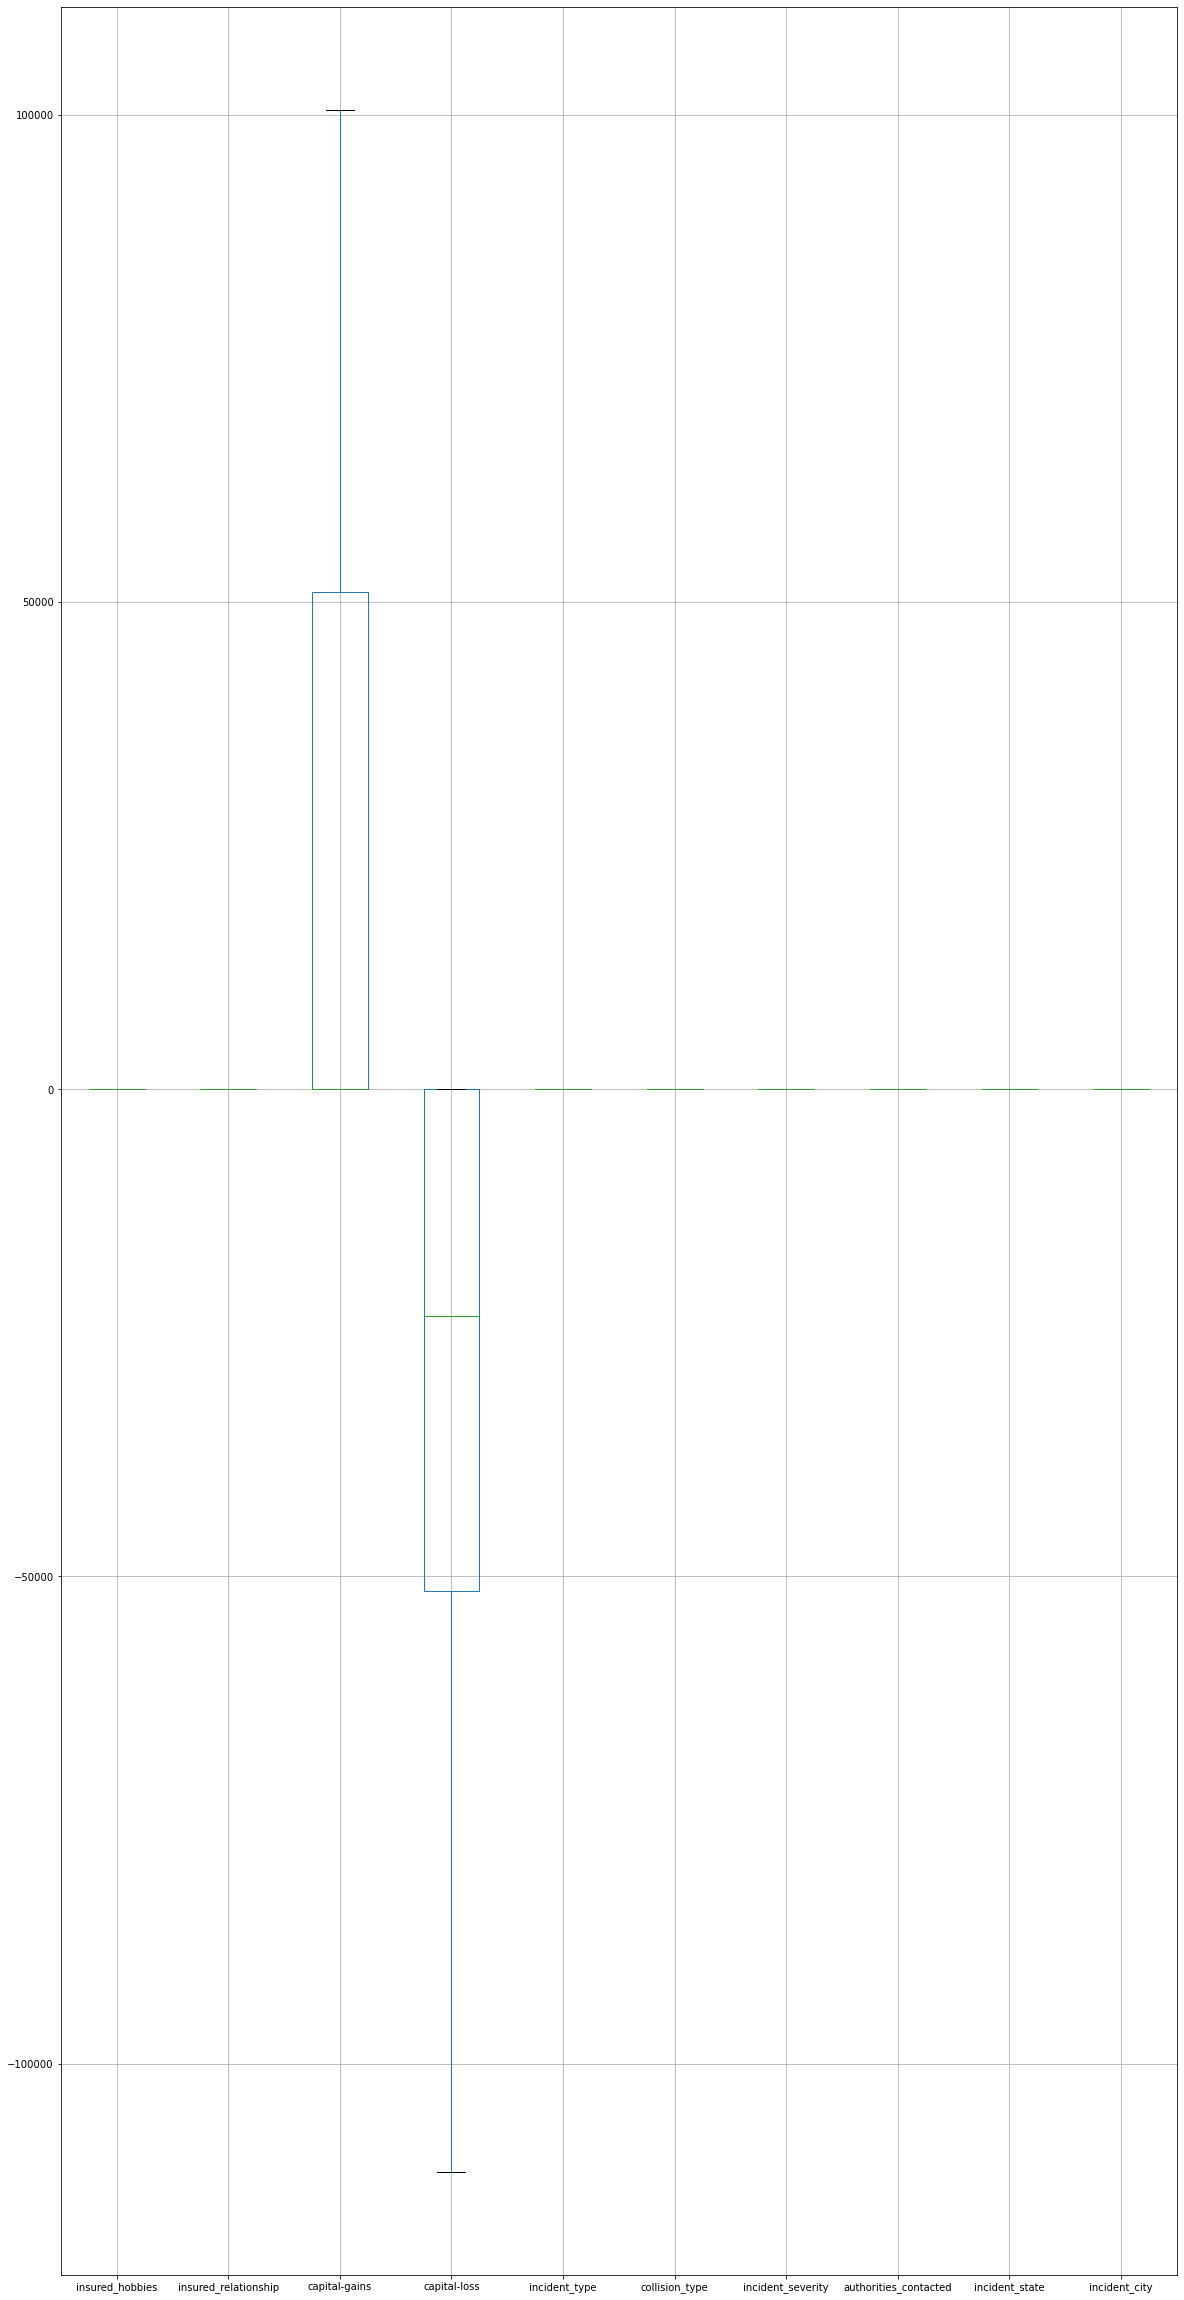

In [42]:
#checking the outliers
df.iloc[:,10:20].boxplot(figsize=[20,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

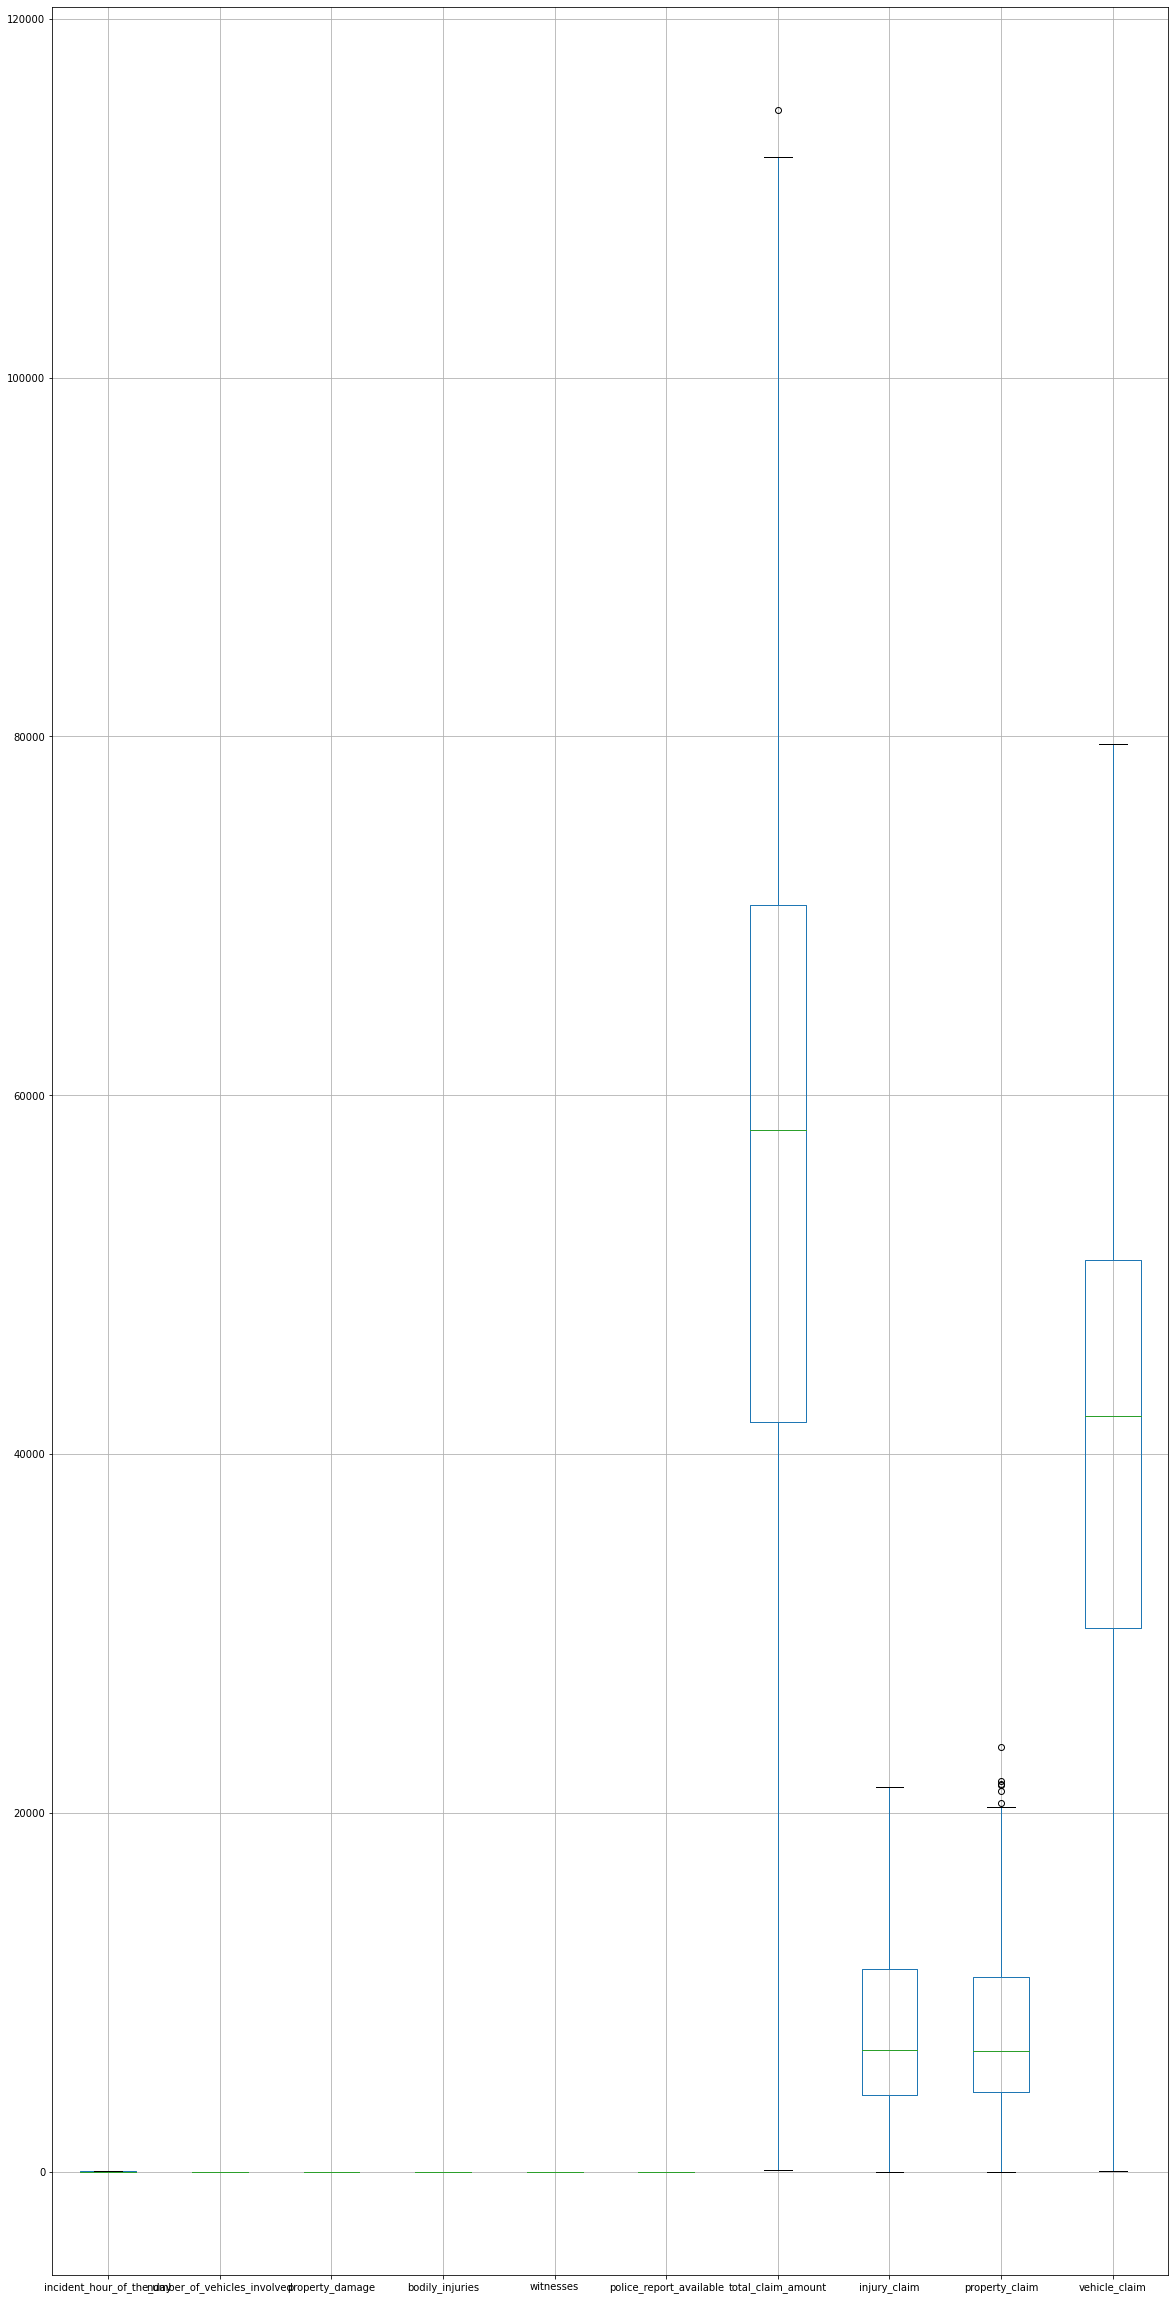

In [43]:
#checking the outliers
df.iloc[:,20:30].boxplot(figsize=[20,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

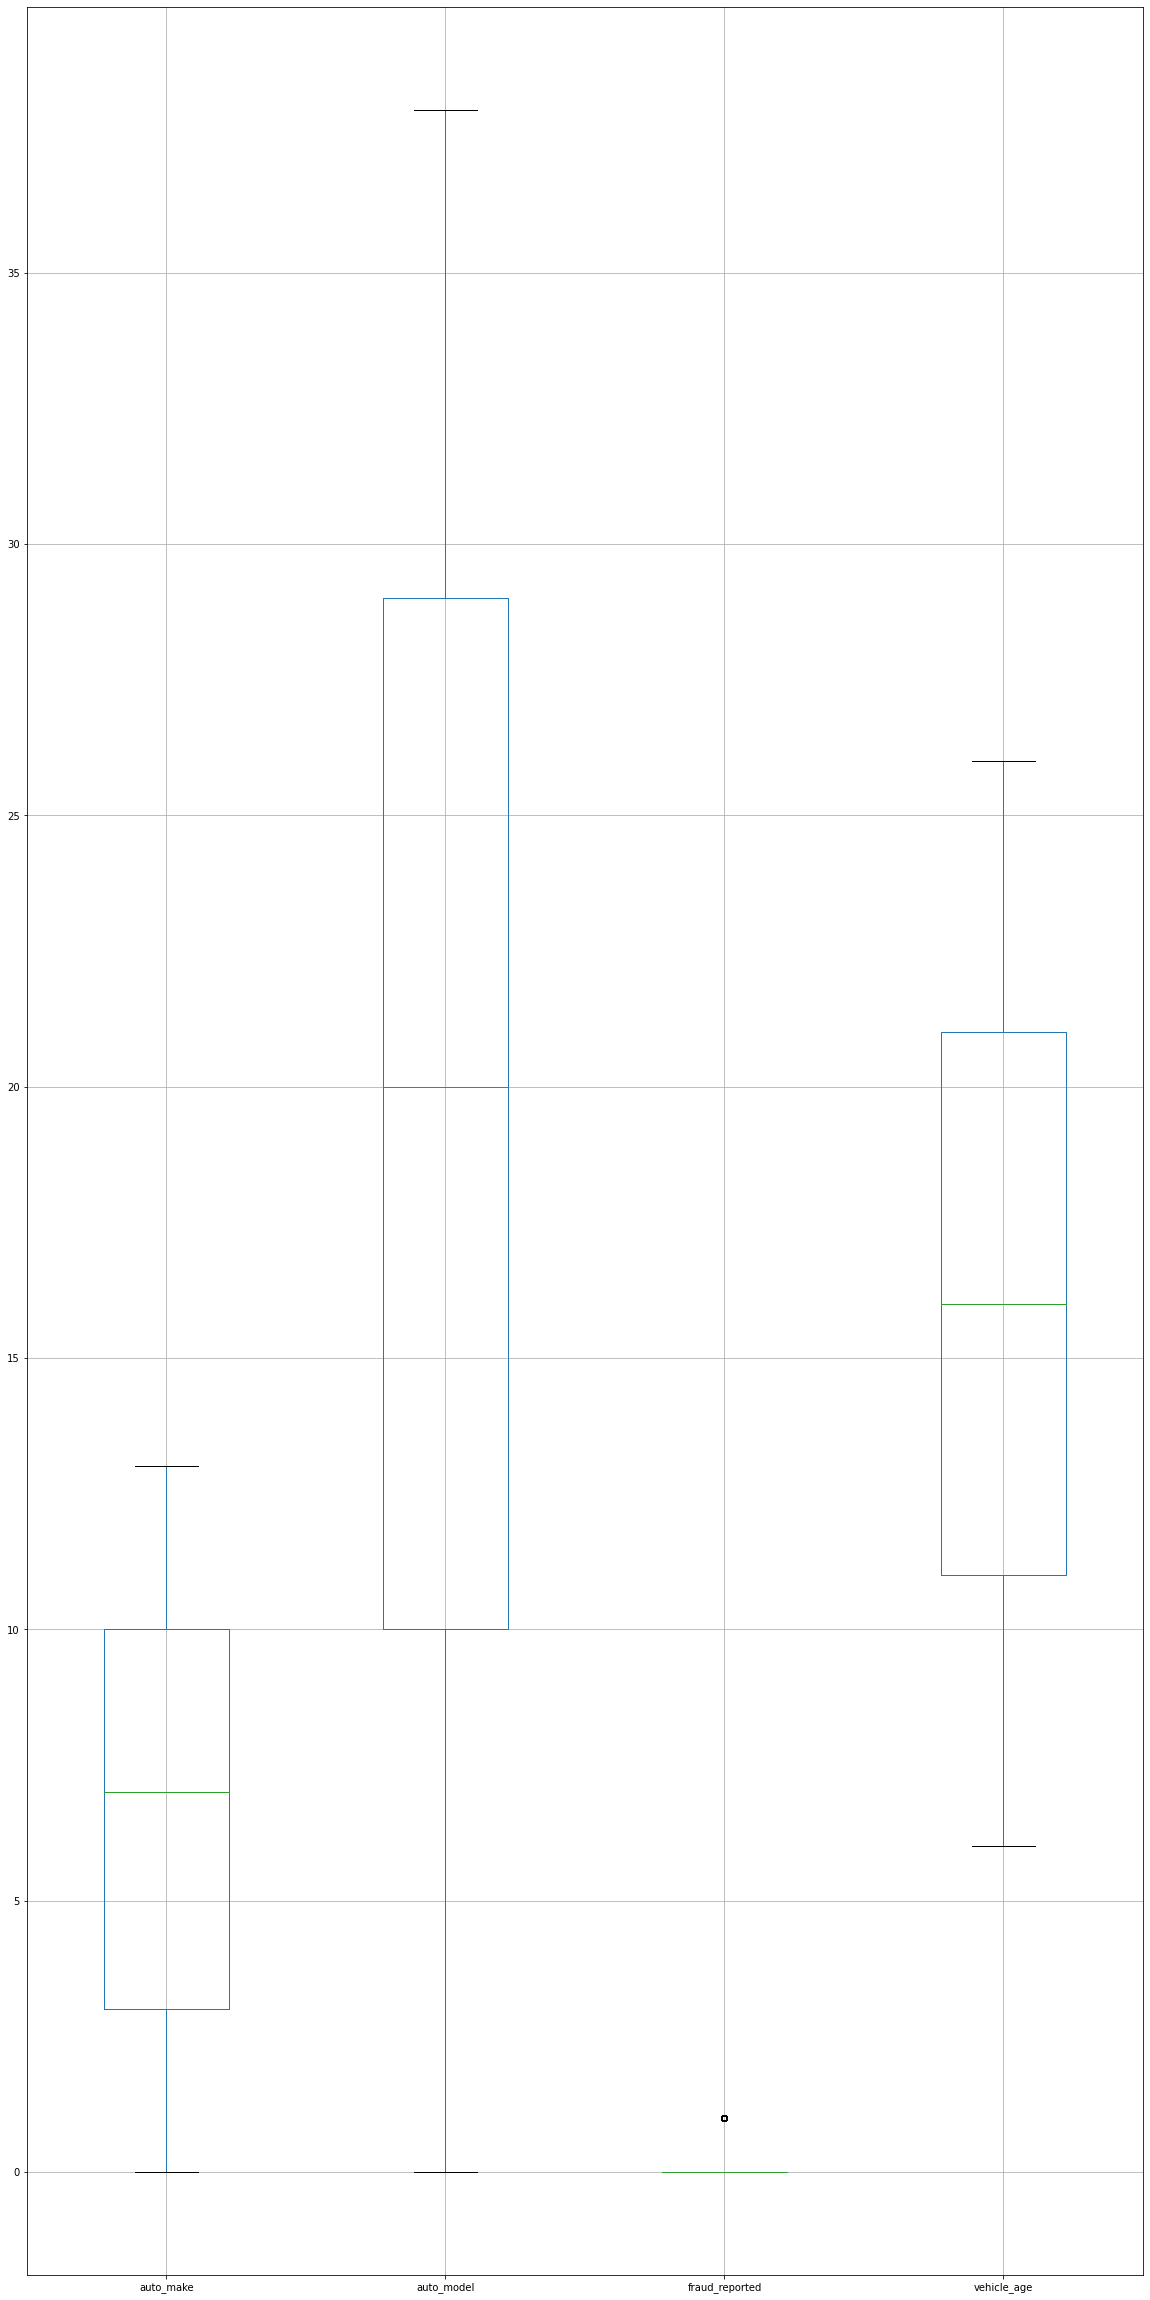

In [44]:
#checking the outliers
df.iloc[:,30:41].boxplot(figsize=[20,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

- As we can see that there are some outliers present in the dataset, So we have to remove it.

In [45]:
#checking the zscore of the dataset to remove the outliers
z=np.abs(zscore(df))
z

array([[1.07813958, 0.99083647, 1.18717314, ..., 1.64574255, 1.74601919,
        0.1834404 ],
       [0.2089946 , 0.33407345, 0.01685641, ..., 0.65747047, 1.74601919,
        0.31549088],
       [0.60800168, 1.08891308, 1.18717314, ..., 0.95970204, 0.57273139,
        0.31549088],
       ...,
       [0.64276748, 0.54161057, 1.18717314, ..., 0.02857005, 0.57273139,
        1.5139238 ],
       [2.20802805, 2.52328351, 1.22088596, ..., 1.28637088, 0.57273139,
        1.18130295],
       [2.19064515, 2.3043625 , 1.18717314, ..., 0.65747047, 0.57273139,
        0.31549088]])

In [46]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int32), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 28,  6,  6,  6,  5, 13,
        6,  6,  6], dtype=int32))


In [47]:
df_new=df[(z<3).all(axis=1)]  # removing outliers

In [48]:
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,2.0,1.0,1000,1406.91,0,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,3.0,0.0,4.0,4.0,1.0,5,1,2.0,1,2,2.0,71610,6510,13020,52080,10.0,1.0,1.0,17
1,228,42,1.0,1.0,2000,1197.22,5000000,1.0,4.0,6.0,15.0,2.0,0,0,3.0,0.0,1.0,4.0,5.0,5.0,8,1,0.0,0,0,0.0,5070,780,780,3510,8.0,12.0,1.0,14
2,134,29,2.0,0.0,2000,1413.14,5000000,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,2.0,1.0,4.0,1.0,1.0,7,3,1.0,2,3,1.0,34650,7700,3850,23100,4.0,30.0,0.0,14
3,256,41,0.0,1.0,2000,1415.74,6000000,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,1.0,0.0,4.0,2.0,0.0,5,1,0.0,1,2,1.0,63400,6340,6340,50720,3.0,34.0,1.0,7
4,228,44,0.0,2.0,1000,1583.91,6000000,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,0.0,1.0,2.0,1.0,0.0,20,1,1.0,0,1,1.0,6500,1300,650,4550,0.0,31.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,0.0,5.0,2.0,13.0,4.0,0,0,2.0,1.0,1.0,1.0,0.0,4.0,20,1,2.0,0,1,0.0,87200,17440,8720,61040,6.0,6.0,0.0,15
996,285,41,0.0,0.0,1000,1436.79,0,0.0,6.0,9.0,17.0,5.0,70900,0,2.0,2.0,0.0,1.0,4.0,3.0,23,1,2.0,2,3,0.0,108480,18080,18080,72320,13.0,28.0,0.0,6
997,130,34,2.0,1.0,500,1383.49,3000000,0.0,5.0,1.0,3.0,2.0,35100,0,0.0,3.0,1.0,4.0,0.0,0.0,4,3,0.0,2,3,2.0,67500,7500,7500,52500,11.0,19.0,0.0,25
998,458,62,0.0,2.0,2000,1356.92,5000000,1.0,0.0,5.0,0.0,5.0,0,0,2.0,2.0,0.0,3.0,1.0,0.0,2,1,0.0,0,1,2.0,46980,5220,5220,36540,1.0,5.0,0.0,23


In [49]:
df_new.shape

(980, 34)

In [50]:
#splitting the dataset into independent and target variables in x and y respectively

x=df_new.drop(['fraud_reported'], axis=1)
y=df_new['fraud_reported']

In [51]:
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757
witnesses                      0.026211


In [55]:
x["umbrella_limit"]=np.sqrt(x["umbrella_limit"])

In [56]:
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.648539
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757
witnesses                      0.026211


In [63]:
x.isnull().any()

months_as_customer             False
age                            False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                  True
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
witnesses                      False
police_report_available        False
total_claim_amount             False
i

In [64]:
x['umbrella_limit'].fillna(x['umbrella_limit'].mode()[0], inplace = True)

In [65]:
x.isnull().any()

months_as_customer             False
age                            False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
witnesses                      False
police_report_available        False
total_claim_amount             False
i

### Model Building

In [66]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vehicle_age
0,328,48,2.0,1.0,1000,1406.91,0.000000,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,3.0,0.0,4.0,4.0,1.0,5,1,2.0,1,2,2.0,71610,6510,13020,52080,10.0,1.0,17
1,228,42,1.0,1.0,2000,1197.22,2236.067977,1.0,4.0,6.0,15.0,2.0,0,0,3.0,0.0,1.0,4.0,5.0,5.0,8,1,0.0,0,0,0.0,5070,780,780,3510,8.0,12.0,14
2,134,29,2.0,0.0,2000,1413.14,2236.067977,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,2.0,1.0,4.0,1.0,1.0,7,3,1.0,2,3,1.0,34650,7700,3850,23100,4.0,30.0,14
3,256,41,0.0,1.0,2000,1415.74,2449.489743,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,1.0,0.0,4.0,2.0,0.0,5,1,0.0,1,2,1.0,63400,6340,6340,50720,3.0,34.0,7
4,228,44,0.0,2.0,1000,1583.91,2449.489743,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,0.0,1.0,2.0,1.0,0.0,20,1,1.0,0,1,1.0,6500,1300,650,4550,0.0,31.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0.000000,0.0,5.0,2.0,13.0,4.0,0,0,2.0,1.0,1.0,1.0,0.0,4.0,20,1,2.0,0,1,0.0,87200,17440,8720,61040,6.0,6.0,15
996,285,41,0.0,0.0,1000,1436.79,0.000000,0.0,6.0,9.0,17.0,5.0,70900,0,2.0,2.0,0.0,1.0,4.0,3.0,23,1,2.0,2,3,0.0,108480,18080,18080,72320,13.0,28.0,6
997,130,34,2.0,1.0,500,1383.49,1732.050808,0.0,5.0,1.0,3.0,2.0,35100,0,0.0,3.0,1.0,4.0,0.0,0.0,4,3,0.0,2,3,2.0,67500,7500,7500,52500,11.0,19.0,25
998,458,62,0.0,2.0,2000,1356.92,2236.067977,1.0,0.0,5.0,0.0,5.0,0,0,2.0,2.0,0.0,3.0,1.0,0.0,2,1,0.0,0,1,2.0,46980,5220,5220,36540,1.0,5.0,23


In [67]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: fraud_reported, Length: 980, dtype: float64

In [68]:
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.764030612244898
At random state 0, the testing accuracy is:- 0.7346938775510204


At random state 1, the training accuracy is:- 0.7512755102040817
At random state 1, the testing accuracy is:- 0.7806122448979592


At random state 2, the training accuracy is:- 0.7665816326530612
At random state 2, the testing accuracy is:- 0.7193877551020408


At random state 3, the training accuracy is:- 0.7512755102040817
At random state 3, the testing accuracy is:- 0.7806122448979592


At random state 4, the training accuracy is:- 0.7512755102040817
At random state 4, the testing accuracy is:- 0.7806122448979592


At random state 5, the training accuracy is:- 0.7602040816326531
At random state 5, the testing accuracy is:- 0.7551020408163265


At random state 6, the training accuracy is:- 0.7525510204081632
At random state 6, the testing accuracy is:- 0.7653061224489796


At random state 7, the training accuracy is:- 0.7474489795918368
At random state 7, 

At random state 64, the training accuracy is:- 0.7563775510204082
At random state 64, the testing accuracy is:- 0.7755102040816326


At random state 65, the training accuracy is:- 0.75
At random state 65, the testing accuracy is:- 0.7653061224489796


At random state 66, the training accuracy is:- 0.7563775510204082
At random state 66, the testing accuracy is:- 0.7602040816326531


At random state 67, the training accuracy is:- 0.7474489795918368
At random state 67, the testing accuracy is:- 0.7857142857142857


At random state 68, the training accuracy is:- 0.735969387755102
At random state 68, the testing accuracy is:- 0.8367346938775511


At random state 69, the training accuracy is:- 0.75
At random state 69, the testing accuracy is:- 0.7857142857142857


At random state 70, the training accuracy is:- 0.7576530612244898
At random state 70, the testing accuracy is:- 0.75


At random state 71, the training accuracy is:- 0.7589285714285714
At random state 71, the testing accuracy is:- 

At random state 128, the training accuracy is:- 0.7589285714285714
At random state 128, the testing accuracy is:- 0.75


At random state 129, the training accuracy is:- 0.7538265306122449
At random state 129, the testing accuracy is:- 0.7653061224489796


At random state 130, the training accuracy is:- 0.7474489795918368
At random state 130, the testing accuracy is:- 0.8112244897959183


At random state 131, the training accuracy is:- 0.764030612244898
At random state 131, the testing accuracy is:- 0.7193877551020408


At random state 132, the training accuracy is:- 0.7602040816326531
At random state 132, the testing accuracy is:- 0.7346938775510204


At random state 133, the training accuracy is:- 0.7461734693877551
At random state 133, the testing accuracy is:- 0.7857142857142857


At random state 134, the training accuracy is:- 0.7589285714285714
At random state 134, the testing accuracy is:- 0.7448979591836735


At random state 135, the training accuracy is:- 0.7563775510204082
At 

At random state 190, the training accuracy is:- 0.7487244897959183
At random state 190, the testing accuracy is:- 0.7806122448979592


At random state 191, the training accuracy is:- 0.7525510204081632
At random state 191, the testing accuracy is:- 0.7602040816326531


At random state 192, the training accuracy is:- 0.7576530612244898
At random state 192, the testing accuracy is:- 0.7653061224489796


At random state 193, the training accuracy is:- 0.7538265306122449
At random state 193, the testing accuracy is:- 0.7806122448979592


At random state 194, the training accuracy is:- 0.7563775510204082
At random state 194, the testing accuracy is:- 0.7602040816326531


At random state 195, the training accuracy is:- 0.7614795918367347
At random state 195, the testing accuracy is:- 0.7551020408163265


At random state 196, the training accuracy is:- 0.7563775510204082
At random state 196, the testing accuracy is:- 0.75


At random state 197, the training accuracy is:- 0.7563775510204082
At

- From the above stats, at random state 68 the testing accuracy and training accuracy is hightest.

- Testing the best Random State in different algorithms

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=68)

In [72]:
model=[LogisticRegression(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [73]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('accuracy score of',n,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8367346938775511
[[161   2]
 [ 30   3]]
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       163
         1.0       0.60      0.09      0.16        33

    accuracy                           0.84       196
   macro avg       0.72      0.54      0.53       196
weighted avg       0.80      0.84      0.78       196



accuracy score of SVC() is:
0.8316326530612245
[[163   0]
 [ 33   0]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       163
         1.0       0.00      0.00      0.00        33

    accuracy                           0.83       196
   macro avg       0.42      0.50      0.45       196
weighted avg       0.69      0.83      0.76       196



accuracy score of RandomForestClassifier() is:
0.8163265306122449
[[143  20]
 [ 16  17]]
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89

- Now checking cross validation score to check whether our models are overfitted or underfitted.

In [74]:
scrlr=cross_val_score(LogisticRegression(),x,y, cv=5)
print('cross validation score of logisticregression: ',scrlr.mean())

cross validation score of logisticregression:  0.75


In [75]:
scrrf=cross_val_score(RandomForestClassifier(),x,y, cv=5)
print('cross validation score of randomforestclassifier: ',scrrf.mean())

cross validation score of randomforestclassifier:  0.7653061224489794


In [76]:
scrdtc=cross_val_score(DecisionTreeClassifier(),x,y, cv=5)
print('cross validation score of decisiontree classifier: ',scrdtc.mean())

cross validation score of decisiontree classifier:  0.776530612244898


In [77]:
scrsvc=cross_val_score(SVC(),x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.7551020408163265


In [78]:
scrada=cross_val_score(AdaBoostClassifier(),x,y, cv=5)
print('cross validation score of AdaBoostClassifier: ',scrada.mean())

cross validation score of AdaBoostClassifier:  0.7928571428571429


In [79]:
scrkn=cross_val_score(KNeighborsClassifier(),x,y, cv=5)
print('cross validation score of KNeighborsClassifier: ',scrkn.mean())

cross validation score of KNeighborsClassifier:  0.6908163265306122


- As we can see the Minimum difference in accuracy score and cross validation score is for DecisionTreeClassifier(4) so it is our best model.

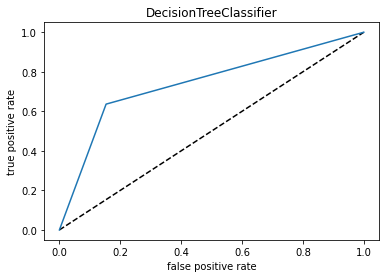

In [80]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

- Doing GridSearchCV for getting best parameters for DecisionTreeClassifier()

In [81]:
#creating parameter list to pass in GridSearchCV
parameters= {'criterion': ['gini','entropy'],
             'splitter': ['best','random'],
             'max_depth': np.arange(0,5),}

In [82]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([0, 1, 2, 3, 4]),
                         'splitter': ['best', 'random']})

In [84]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [85]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [86]:
accuracy_score(GCV_pred,y_test)

0.8163265306122449

In [87]:
joblib.dump(GCV.best_estimator_,'Insurance_claims.obj')

['Insurance_claims.obj']

> Case Study:

- Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

- We will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.


> Findings:

-  majority of the people that claim insurance are not fraud.
- from 'OH' state more people claim the insurance.
- all the 3 states the majority of the claims are not fraud.
- the age of the people that claims the insurance are in range from 20 to 65.
- more number of female are insured.
- majority of the people who are insured are from 'high school' or 'JD'.
- majority of the person that are insured are working as 'machine-op-inspct'.
- more number of people that are insured have a hobby of 'reading'.
- more number of people have insured their 'own-child'.
- the majority of the incident are of 'Mutiple-vechile collision' or 'single vehicle collision'.
- more collision are from Rear.
- in majority of the cases, the 'Fire' and 'Police' authorities are contacted.
- majority of the incident only have minor damage.
- majority of the caims are from 'NY','SC' and 'WV'.
- in major damage condition in 'PA' and 'VA' state only the majority of the claim is not fraud.
- in 'minor damage','Total loss','Trivial Damage' condition no state customer has do a fraud claim.
- more number of automobile are of 'Saab' and 'Dodge'.
- 'Saab','Dodge' and 'Suburu' have maximum claim count.
- the majority claim amount is between 50000 to 60000.
- the majority of the injury claim is between 0 to 1250.
- the majority of the property claim is in range of 0 to 1250.
- majority of the vechile claim is in range from 40000 to 55000.
- vehicle claim amount is most positively correlated column with the fraud_reported column.
- incident_severityis the most negetively correlated column with the fraud_reported column.

> Predictions:

- At random state 68 the testing accuracy and training accuracy is hightest.
- The best accuracy_score is for AdaBoostClassifier.
- the Minimum difference in accuracy score and cross validation score is for DecisionTreeClassifier(4) so it is our best model.
- We are using DecisionTreeClassifier.
- After doing hyperparameter tuning. we increase the score of our model from 77% to 82%.